<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pygimli as pg
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
import os
from os import system
import numpy as np

In [2]:
def callTriangle(filename,
                 quality=33, 
                 triangle='triangle',
                 verbose=True):
    
    filebody = filename.replace('.poly', '')

    syscal = triangle + ' -pq' + str(quality)
    syscal += 'Aa ' + filebody + '.poly'
 
    if verbose:
        print(syscal)

    system(syscal)

In [3]:
world = mt.createWorld(start=[-4e4, -2e4], 
                       end=[4e4, 2e4], 
                       layers=[5e3, 8e3], 
                       area=[0, 0, 0],
                       marker=[1, 2, 3],
                       worldMarker=False)

In [4]:
block = mt.createRectangle(start=[-2e3, 1e3],
                           end=[2e3, 2e3],
                           marker=5,  
                           markerPosition=[0, 1.5e3], 
                           area=1e4, boundaryMarker=10)

In [5]:
prism = mt.createPolygon([
                            [-5e3, 1e3], 
                            [-3e3, 1e3], 
                            [-4e3, 2e3], 
                            [-6e3, 2e3]
                        ],
                        isClosed=True, 
                        marker=6, 
                        markerPosition=[-4.5e3,1.5e3], 
                        area=1e4)

In [6]:
x = np.linspace(-4e4, 4e4, num=157)
topo = -np.exp(-1e-7 * x**2) * 2000
topo[0] = 0.0
topo[-1] = 0.0
topo = np.hstack((5e3, topo, 5e3))
x = np.hstack((-4e4, x, 4e4))
pl = np.stack((x, topo), axis=-1)

In [7]:
srf = mt.createPolygon(pl, isClosed=True, 
                       markerPosition=[-3.99e4,1e1], 
                       marker=4, 
                       area=1e5)

In [8]:
# geom = world + block + prism + srf
geom = world + srf + block + prism

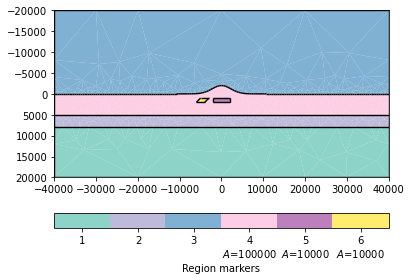

In [9]:
ax, _ = pg.show(geom, 
                showNodes=False, 
                boundaryMarker=False)
ax.set_ylim(ax.get_ylim()[::-1]);

In [10]:
mt.exportPLC(geom,
             '../meshes/model_with_topography.poly', 
             float_format='.5e')

In [11]:
callTriangle('../meshes/model_with_topography.poly', 
             quality=34.2,
             verbose=False)

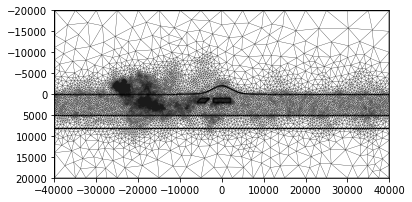

In [12]:
mesh = mt.createMesh(geom, quality=34.2)
ax, _ = pg.show(mesh)
ax.set_ylim(ax.get_ylim()[::-1]);